In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from xgboost import XGBClassifier

In [4]:
import warnings
warnings.filterwarnings('ignore')
import os
import csv
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
import time as timer
from sklearn.inspection import permutation_importance
import itertools
import seaborn as sns
from sklearn.svm import LinearSVC,SVC
from sklearn.multiclass import OneVsRestClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LassoCV,LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier
from sklearn.feature_selection import chi2,SelectKBest,SelectFromModel,RFE,VarianceThreshold
from sklearn.metrics import confusion_matrix,precision_recall_curve,average_precision_score,roc_curve,auc,f1_score,accuracy_score,\
classification_report,multilabel_confusion_matrix, roc_auc_score,precision_recall_fscore_support
from sklearn.model_selection import cross_val_score,train_test_split,StratifiedKFold,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,LabelEncoder,LabelBinarizer
from scipy import interp
from itertools import cycle
plt.style.use('ggplot');
import sys
if ("/your/path/to/xelatex") not in sys.path:
    print('adding path') # I just add this to know if the path was present or not.
    sys.path.append("/your/path/to/xelatex")

adding path


In [6]:
from sklearn.metrics import precision_recall_curve

In [2]:
data= pd.read_csv("data_final1.csv")
data

,Residence,Educational level,Sex_Household_head,Owned mobile phone,Wealth status,Distance to HF,Marital status,Husband education,Age_category,Media_exposure,Religion_recode,Age_houseohld_head_recoded,birth_category,birth_interval,timing_ANC_check,No_ of_children,ANC_visit,working_status,place_of_delivery
0,0,1,0,0,4,1,5,5,0,0,8,1,2,2,1,0,2,1,0
1,0,0,0,0,0,1,5,5,2,0,8,2,0,3,0,1,2,1,1
2,0,1,0,0,3,0,5,5,1,0,8,2,1,3,0,1,0,1,1
3,0,1,1,0,4,1,5,5,1,0,8,2,1,1,0,0,2,1,1
4,0,1,0,0,1,1,5,5,0,0,8,1,1,2,1,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86004,0,1,0,0,1,1,5,5,1,1,4,2,1,3,1,0,3,0,0
86005,0,1,0,0,3,0,5,5,2,0,7,2,3,3,1,1,3,0,0
86006,0,2,0,1,3,1,5,5,1,1,4,2,2,3,1,1,2,1,1
86007,0,1,1,1,1,1,5,5,0,1,6,1,1,3,0,0,3,1,1


In [8]:
##Data Preprocessing/Feauture selection
X = data.drop('place_of_delivery',axis=1)
y = data.place_of_delivery
num_features_opt = 40   # the number of features that we need to choose as a result
num_features_max = 60   # the somewhat excessive number of features, which we will choose at each stage
features_best = []

In [9]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN()

X_resampled, y_resampled = smote_enn.fit_resample(data.loc[:, data.columns != 'place_of_delivery'], data['place_of_delivery'])
print("Shape of X_resampled: {}".format(X_resampled.shape))
print("Shape of y_resampled: {}".format(y_resampled.shape))

Shape of X_resampled: (84749, 23)
Shape of y_resampled: (84749,)


In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np

def split_train_valid_test(X, y, test_size=0.2, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=test_size/(1-test_size), random_state=random_state, stratify=y_train)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

# Usage example
X_train_resampled, X_valid_resampled, X_test_resampled, y_train_resampled, y_valid_resampled, y_test_resampled = split_train_valid_test(X_resampled, y_resampled, test_size=0.3, random_state=42)
_, train_counts = np.unique(y_train_resampled, return_counts=True)
_, valid_counts = np.unique(y_valid_resampled, return_counts=True)
_, test_counts = np.unique(y_test_resampled, return_counts=True)
print("[train] # class 0: {} | # class 1: {}".format(train_counts[0], train_counts[1]))
print("[valid] # class 0: {} | # class 1: {}".format(valid_counts[0], valid_counts[1]))
print("[test]  # class 0: {} | # class 1: {}".format(test_counts[0], test_counts[1]))

[train] # class 0: 21171 | # class 1: 12728
[valid] # class 0: 15879 | # class 1: 9546
[test]  # class 0: 15879 | # class 1: 9546


In [3]:
#Apply the Scaling code here
#Apply the Scaling code here
#Apply the Scaling code here
#Apply the Scaling code here
#Apply the Scaling code here

In [16]:
# Plot learning curve
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Healthcare delivery in East Africa")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#80CBC4",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#00897B",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
def plot_cm(y_test,y_pred):
    ax= plt.subplot()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "BuGn");
    # labels, title and ticks
    ax.set_xlabel("Predicted labels");
    ax.set_ylabel("True labels"); 
    ax.set_title("Confusion Matrix"); 
    ax.xaxis.set_ticklabels(["No", "Yes"]);
    ax.yaxis.set_ticklabels(["No", "Yes"]);
    print("Classification Report")
    print(classification_report(y_test, y_pred))

In [32]:
# Support Vector Machine (SVM)
start = timer.time()
svm_model = SVC(kernel='poly',probability=True)
svm_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_svm = svm_model.predict(X_test_resampled_std)
y_svm_prob = svm_model.predict_proba(X_test_resampled_std)

Finished training within 119.69 seconds


Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9143631229708612

Generation 2 - Current best internal CV score: 0.9143631229708612

Generation 3 - Current best internal CV score: 0.9174017582496005

Generation 4 - Current best internal CV score: 0.9174017582496005

Generation 5 - Current best internal CV score: 0.9174017582496005

Generation 6 - Current best internal CV score: 0.9174017582496005

Generation 7 - Current best internal CV score: 0.9174017582496005

Generation 8 - Current best internal CV score: 0.9174017582496005

Generation 9 - Current best internal CV score: 0.9174017582496005

Generation 10 - Current best internal CV score: 0.9177262898914356

Best pipeline: KNeighborsClassifier(GradientBoostingClassifier(ZeroCount(ZeroCount(input_matrix)), learning_rate=1.0, max_depth=3, max_features=0.35000000000000003, min_samples_leaf=13, min_samples_split=7, n_estimators=100, subsample=0.6500000000000001), n_neighbors=1, p=1, weights=uniform)
Accuracy score for SVM: 0.93
Precis

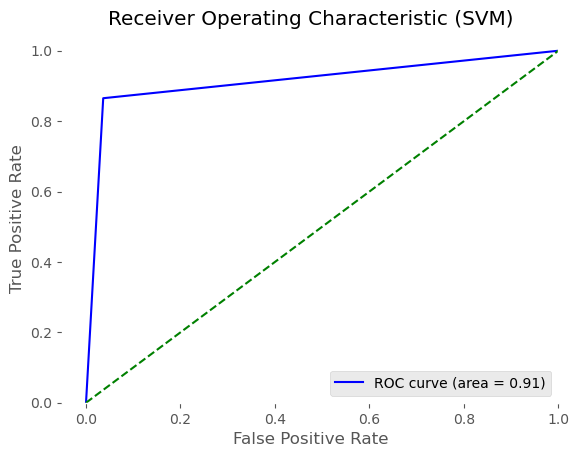

In [34]:
from tpot import TPOTClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create the TPOTClassifier object
tpot = TPOTClassifier(generations=10, population_size=50, verbosity=2)

# Perform genetic algorithm-based optimization to find the best model and hyperparameters
tpot.fit(X_train_resampled_std, y_train_resampled)

# Get the best SVM model with the optimal hyperparameters
best_svm_model = tpot.fitted_pipeline_

# Predict the test set results using the best model
y_svm = best_svm_model.predict(X_test_resampled_std)
y_svm_prob = best_svm_model.predict_proba(X_test_resampled_std)

accuracy_score_svm = accuracy_score(y_test_resampled, y_svm)
print("Accuracy score for SVM: {:.2f}".format(accuracy_score_svm))

# Calculate precision, recall, and F1 scores
prec_svm = precision_score(y_test_resampled, y_svm)
rec_svm = recall_score(y_test_resampled, y_svm)
f1_svm = f1_score(y_test_resampled, y_svm)
print("Precision score for SVM: {:.2f}".format(prec_svm))
print("Recall score for SVM: {:.2f}".format(rec_svm))
print("F1 score for SVM: {:.2f}".format(f1_svm))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_svm).ravel()
sens_svm = tp / (tp + fn)
spec_svm = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_svm_prob[:, 1])
auc_svm = roc_auc_score(y_test_resampled, y_svm_prob[:, 1])

print("Sensitivity score for SVM: {:.2f}".format(sens_svm))
print("Specificity score for SVM: {:.2f}".format(spec_svm))
print("AUC score for SVM: {:.2f}".format(auc_svm))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_svm)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (SVM)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [17]:
#Gaussian Naive Bayes (GNB)
start = timer.time()
gnb_model = GaussianNB()
gnb_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_gnb = gnb_model.predict(X_test_resampled_std)
y_gnb_prob = gnb_model.predict_proba(X_test_resampled_std)

Finished training within 0.07 seconds


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9145992373636961

Generation 2 - Current best internal CV score: 0.9145992373636961

Generation 3 - Current best internal CV score: 0.9145992373636961

Generation 4 - Current best internal CV score: 0.9145992373636961

Generation 5 - Current best internal CV score: 0.9145992373636961

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=3, p=1, weights=distance)
Accuracy score for GNB: 0.92
Precision score for GNB: 0.94
Recall score for GNB: 0.85
F1 score for GNB: 0.89
Sensitivity score for GNB: 0.85
Specificity score for GNB: 0.97
AUC score for GNB: 0.96


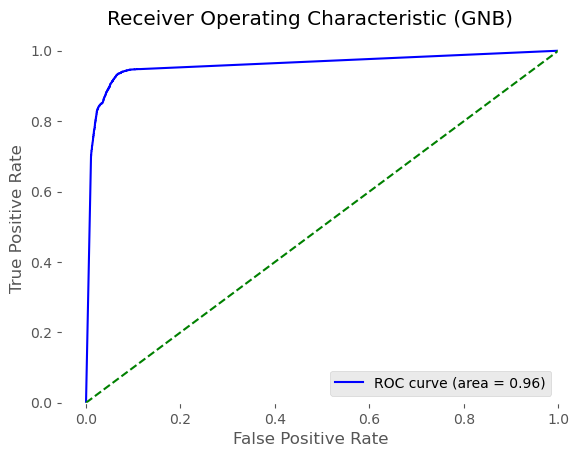

In [19]:
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have the necessary data and have imported the required libraries

# Create the TPOTClassifier with the desired configuration
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, scoring='accuracy', cv=5, random_state=42)

# Fit the TPOTClassifier to the training data
tpot.fit(X_train_resampled_std, y_train_resampled)

# Evaluate the TPOTClassifier on the test data
y_gnb = tpot.predict(X_test_resampled_std)
y_gnb_prob = tpot.predict_proba(X_test_resampled_std)

# Calculate and print accuracy score
accuracy_score_gnb = accuracy_score(y_test_resampled, y_gnb)
print("Accuracy score for GNB: {:.2f}".format(accuracy_score_gnb))

# Calculate precision, recall, and F1 scores
prec_gnb = precision_score(y_test_resampled, y_gnb)
rec_gnb = recall_score(y_test_resampled, y_gnb)
f1_gnb = f1_score(y_test_resampled, y_gnb)
print("Precision score for GNB: {:.2f}".format(prec_gnb))
print("Recall score for GNB: {:.2f}".format(rec_gnb))
print("F1 score for GNB: {:.2f}".format(f1_gnb))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_gnb).ravel()
sens_gnb = tp / (tp + fn)
spec_gnb = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_gnb_prob[:, 1])
auc_gnb = roc_auc_score(y_test_resampled, y_gnb_prob[:, 1])

print("Sensitivity score for GNB: {:.2f}".format(sens_gnb))
print("Specificity score for GNB: {:.2f}".format(spec_gnb))
print("AUC score for GNB: {:.2f}".format(auc_gnb))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_gnb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (GNB)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression

start = timer.time()
logit_model = LogisticRegression(solver='lbfgs', random_state=42)
logit_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end - start))

# Predicting the test set results
y_logit = logit_model.predict(X_test_resampled_std)
y_logit_prob = logit_model.predict_proba(X_test_resampled_std)

Finished training within 0.08 seconds


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9145992373636961

Generation 2 - Current best internal CV score: 0.9145992373636961

Generation 3 - Current best internal CV score: 0.9145992373636961

Generation 4 - Current best internal CV score: 0.9145992373636961

Generation 5 - Current best internal CV score: 0.9145992373636961

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=3, p=1, weights=distance)
Accuracy score for Logistic Regression: 0.92
Precision score for Logistic Regression: 0.94
Recall score for Logistic Regression: 0.85
F1 score for Logistic Regression: 0.89
Sensitivity score for Logistic Regression: 0.85
Specificity score for Logistic Regression: 0.97
AUC score for Logistic Regression: 0.96


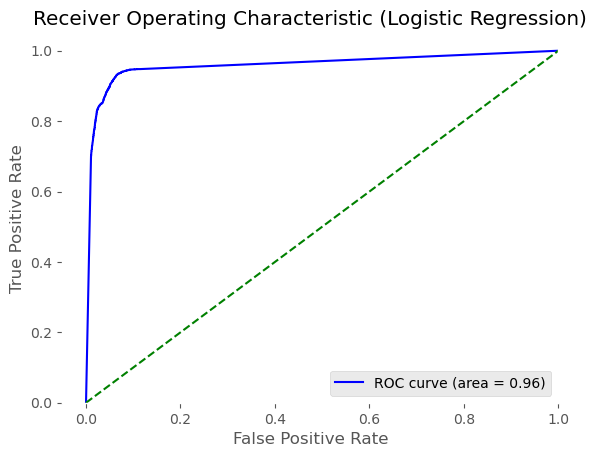

In [22]:
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have the necessary data and have imported the required libraries

# Create the TPOTClassifier with the desired configuration
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, scoring='accuracy', cv=5, random_state=42)

# Fit the TPOTClassifier to the training data
tpot.fit(X_train_resampled_std, y_train_resampled)

# Get the best Logistic Regression model with the optimal hyperparameters
best_logit_model = tpot.fitted_pipeline_

# Predict the test set results using the best model
y_logit = best_logit_model.predict(X_test_resampled_std)
y_logit_prob = best_logit_model.predict_proba(X_test_resampled_std)

# Calculate and print accuracy score
accuracy_score_logit = accuracy_score(y_test_resampled, y_logit)
print("Accuracy score for Logistic Regression: {:.2f}".format(accuracy_score_logit))

# Calculate precision, recall, and F1 scores
prec_logit = precision_score(y_test_resampled, y_logit)
rec_logit = recall_score(y_test_resampled, y_logit)
f1_logit = f1_score(y_test_resampled, y_logit)
print("Precision score for Logistic Regression: {:.2f}".format(prec_logit))
print("Recall score for Logistic Regression: {:.2f}".format(rec_logit))
print("F1 score for Logistic Regression: {:.2f}".format(f1_logit))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_logit).ravel()
sens_logit = tp / (tp + fn)
spec_logit = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_logit_prob[:, 1])
auc_logit = roc_auc_score(y_test_resampled, y_logit_prob[:, 1])

print("Sensitivity score for Logistic Regression: {:.2f}".format(sens_logit))
print("Specificity score for Logistic Regression: {:.2f}".format(spec_logit))
print("AUC score for Logistic Regression: {:.2f}".format(auc_logit))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_logit)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (Logistic Regression)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [24]:
##  DT
start = timer.time()
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_dtree = dtree_model.predict(X_test_resampled_std)
y_dtree_prob = dtree_model.predict_proba(X_test_resampled_std)

Finished training within 0.17 seconds


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9145992373636961

Generation 2 - Current best internal CV score: 0.9145992373636961

Generation 3 - Current best internal CV score: 0.9145992373636961

Generation 4 - Current best internal CV score: 0.9145992373636961

Generation 5 - Current best internal CV score: 0.9145992373636961

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=3, p=1, weights=distance)
Accuracy score for Decision Tree Classifier: 0.92
Precision score for Decision Tree Classifier: 0.94
Recall score for Decision Tree Classifier: 0.85
F1 score for Decision Tree Classifier: 0.89
Sensitivity score for Decision Tree Classifier: 0.85
Specificity score for Decision Tree Classifier: 0.97
AUC score for Decision Tree Classifier: 0.96


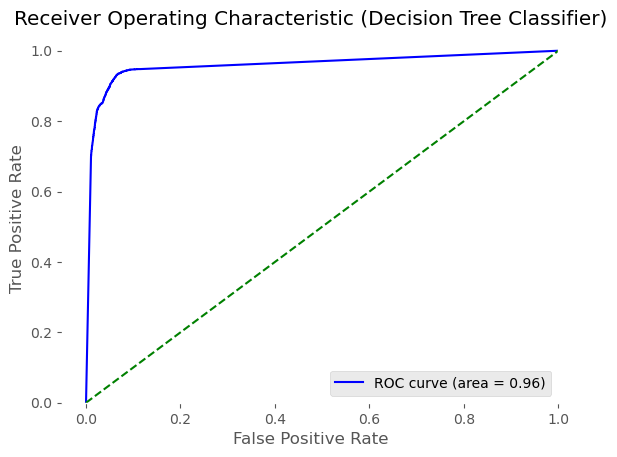

In [26]:
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have the necessary data and have imported the required libraries

# Create the TPOTClassifier with the desired configuration
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, scoring='accuracy', cv=5, random_state=42)

# Fit the TPOTClassifier to the training data
tpot.fit(X_train_resampled_std, y_train_resampled)

# Get the best Decision Tree Classifier model with the optimal hyperparameters
best_dtree_model = tpot.fitted_pipeline_

# Predict the test set results using the best model
y_dtree = best_dtree_model.predict(X_test_resampled_std)
y_dtree_prob = best_dtree_model.predict_proba(X_test_resampled_std)

# Calculate and print accuracy score
accuracy_score_dtree = accuracy_score(y_test_resampled, y_dtree)
print("Accuracy score for Decision Tree Classifier: {:.2f}".format(accuracy_score_dtree))

# Calculate precision, recall, and F1 scores
prec_dtree = precision_score(y_test_resampled, y_dtree)
rec_dtree = recall_score(y_test_resampled, y_dtree)
f1_dtree = f1_score(y_test_resampled, y_dtree)
print("Precision score for Decision Tree Classifier: {:.2f}".format(prec_dtree))
print("Recall score for Decision Tree Classifier: {:.2f}".format(rec_dtree))
print("F1 score for Decision Tree Classifier: {:.2f}".format(f1_dtree))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_dtree).ravel()
sens_dtree = tp / (tp + fn)
spec_dtree = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_dtree_prob[:, 1])
auc_dtree = roc_auc_score(y_test_resampled, y_dtree_prob[:, 1])

print("Sensitivity score for Decision Tree Classifier: {:.2f}".format(sens_dtree))
print("Specificity score for Decision Tree Classifier: {:.2f}".format(spec_dtree))
print("AUC score for Decision Tree Classifier: {:.2f}".format(auc_dtree))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_dtree)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (Decision Tree Classifier)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [27]:
## RF
start = timer.time()
ranfor_model = RandomForestClassifier(n_estimators=100, random_state=42)
ranfor_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_ranfor = ranfor_model.predict(X_test_resampled_std)
y_ranfor_prob = ranfor_model.predict_proba(X_test_resampled_std)

Finished training within 3.39 seconds


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9145992373636961

Generation 2 - Current best internal CV score: 0.9145992373636961

Generation 3 - Current best internal CV score: 0.9145992373636961

Generation 4 - Current best internal CV score: 0.9145992373636961

Generation 5 - Current best internal CV score: 0.9145992373636961

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=3, p=1, weights=distance)
Accuracy score for RandomForestClassifier: 0.92
Precision score for RandomForestClassifier: 0.94
Recall score for RandomForestClassifier: 0.85
F1 score for RandomForestClassifier: 0.89
Sensitivity score for RandomForestClassifier: 0.85
Specificity score for RandomForestClassifier: 0.97
AUC score for RandomForestClassifier: 0.96


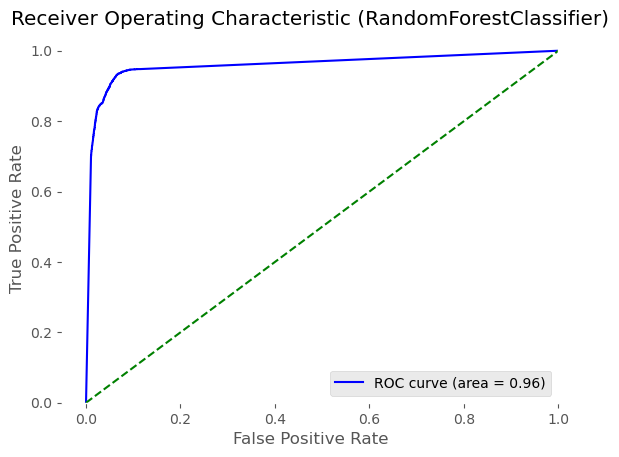

In [29]:
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have the necessary data and have imported the required libraries

# Create the TPOTClassifier with the desired configuration
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, scoring='accuracy', cv=5, random_state=42)

# Fit the TPOTClassifier to the training data
tpot.fit(X_train_resampled_std, y_train_resampled)

# Get the best RandomForestClassifier model with the optimal hyperparameters
best_ranfor_model = tpot.fitted_pipeline_

# Predict the test set results using the best model
y_ranfor = best_ranfor_model.predict(X_test_resampled_std)
y_ranfor_prob = best_ranfor_model.predict_proba(X_test_resampled_std)

# Calculate and print accuracy score
accuracy_score_ranfor = accuracy_score(y_test_resampled, y_ranfor)
print("Accuracy score for RandomForestClassifier: {:.2f}".format(accuracy_score_ranfor))

# Calculate precision, recall, and F1 scores
prec_ranfor = precision_score(y_test_resampled, y_ranfor)
rec_ranfor = recall_score(y_test_resampled, y_ranfor)
f1_ranfor = f1_score(y_test_resampled, y_ranfor)
print("Precision score for RandomForestClassifier: {:.2f}".format(prec_ranfor))
print("Recall score for RandomForestClassifier: {:.2f}".format(rec_ranfor))
print("F1 score for RandomForestClassifier: {:.2f}".format(f1_ranfor))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_ranfor).ravel()
sens_ranfor = tp / (tp + fn)
spec_ranfor = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_ranfor_prob[:, 1])
auc_ranfor = roc_auc_score(y_test_resampled, y_ranfor_prob[:, 1])

print("Sensitivity score for RandomForestClassifier: {:.2f}".format(sens_ranfor))
print("Specificity score for RandomForestClassifier: {:.2f}".format(spec_ranfor))
print("AUC score for RandomForestClassifier: {:.2f}".format(auc_ranfor))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_ranfor)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (RandomForestClassifier)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9145992373636961

Generation 2 - Current best internal CV score: 0.9145992373636961

Generation 3 - Current best internal CV score: 0.9145992373636961

Generation 4 - Current best internal CV score: 0.9145992373636961

Generation 5 - Current best internal CV score: 0.9145992373636961

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=3, p=1, weights=distance)
Accuracy score for RandomForestClassifier with calibration: 0.93
Precision score for RandomForestClassifier with calibration: 0.92
Recall score for RandomForestClassifier with calibration: 0.89
F1 score for RandomForestClassifier with calibration: 0.91
Sensitivity score for RandomForestClassifier with calibration: 0.89
Specificity score for RandomForestClassifier with calibration: 0.96
AUC score for RandomForestClassifier with calibration: 0.97


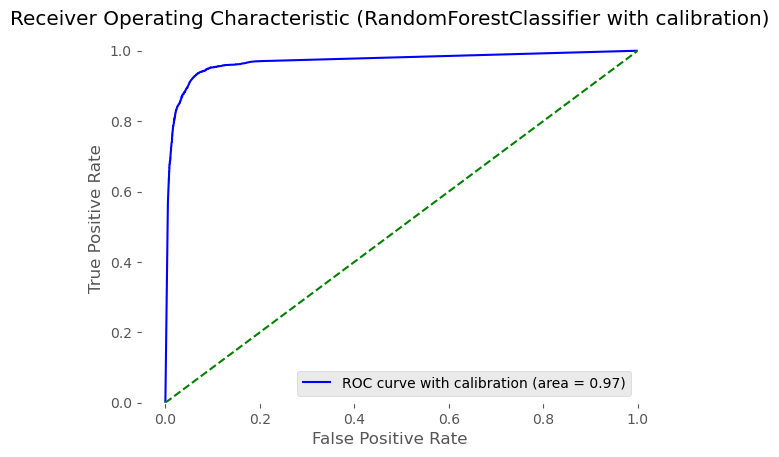

In [113]:
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt

# Assuming you have the necessary data and have imported the required libraries

# Create the TPOTClassifier with the desired configuration
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, scoring='accuracy', cv=5, random_state=42)

# Fit the TPOTClassifier to the training data
tpot.fit(X_train_resampled_std, y_train_resampled)

# Get the best RandomForestClassifier model with the optimal hyperparameters
best_ranfor_model = tpot.fitted_pipeline_

# Wrap the best model with calibration using the isotonic method
calibrated_model = CalibratedClassifierCV(best_ranfor_model, cv=5, method='isotonic')

# Fit the calibrated model to the training data
calibrated_model.fit(X_train_resampled_std, y_train_resampled)

# Predict the test set results using the calibrated model
y_ranfor_calibrated = calibrated_model.predict(X_test_resampled_std)
y_ranfor_calibrated_prob = calibrated_model.predict_proba(X_test_resampled_std)

# Calculate and print accuracy score
accuracy_score_ranfor_calibrated = accuracy_score(y_test_resampled, y_ranfor_calibrated)
print("Accuracy score for RandomForestClassifier with calibration: {:.2f}".format(accuracy_score_ranfor_calibrated))

# Calculate precision, recall, and F1 scores
prec_ranfor_calibrated = precision_score(y_test_resampled, y_ranfor_calibrated)
rec_ranfor_calibrated = recall_score(y_test_resampled, y_ranfor_calibrated)
f1_ranfor_calibrated = f1_score(y_test_resampled, y_ranfor_calibrated)
print("Precision score for RandomForestClassifier with calibration: {:.2f}".format(prec_ranfor_calibrated))
print("Recall score for RandomForestClassifier with calibration: {:.2f}".format(rec_ranfor_calibrated))
print("F1 score for RandomForestClassifier with calibration: {:.2f}".format(f1_ranfor_calibrated))

# Calculate sensitivity, specificity, and AUC
tn_calibrated, fp_calibrated, fn_calibrated, tp_calibrated = confusion_matrix(y_test_resampled, y_ranfor_calibrated).ravel()
sens_ranfor_calibrated = tp_calibrated / (tp_calibrated + fn_calibrated)
spec_ranfor_calibrated = tn_calibrated / (tn_calibrated + fp_calibrated)
fpr_calibrated, tpr_calibrated, _ = roc_curve(y_test_resampled, y_ranfor_calibrated_prob[:, 1])
auc_ranfor_calibrated = roc_auc_score(y_test_resampled, y_ranfor_calibrated_prob[:, 1])

print("Sensitivity score for RandomForestClassifier with calibration: {:.2f}".format(sens_ranfor_calibrated))
print("Specificity score for RandomForestClassifier with calibration: {:.2f}".format(spec_ranfor_calibrated))
print("AUC score for RandomForestClassifier with calibration: {:.2f}".format(auc_ranfor_calibrated))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr_calibrated, tpr_calibrated, color='blue', label='ROC curve with calibration (area = %0.2f)' % auc_ranfor_calibrated)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (RandomForestClassifier with calibration)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [36]:
## LGBM
start = timer.time()
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_gb = gb_model.predict(X_test_resampled_std)
y_gb_prob = gb_model.predict_proba(X_test_resampled_std)

Finished training within 2.85 seconds


Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9145992373636961

Generation 2 - Current best internal CV score: 0.9145992373636961

Generation 3 - Current best internal CV score: 0.9145992373636961

Generation 4 - Current best internal CV score: 0.9145992373636961

Generation 5 - Current best internal CV score: 0.9145992373636961

Generation 6 - Current best internal CV score: 0.9145992373636961

Generation 7 - Current best internal CV score: 0.9145992373636961

Generation 8 - Current best internal CV score: 0.9145992373636961

Generation 9 - Current best internal CV score: 0.9195847448371053

Generation 10 - Current best internal CV score: 0.9195847448371053

Best pipeline: KNeighborsClassifier(CombineDFs(input_matrix, RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.9000000000000001, min_samples_leaf=5, min_samples_split=15, n_estimators=100)), n_neighbors=1, p=1, weights=distance)
Accuracy score for GradientBoostingClassifier: 0.93
Precision sco

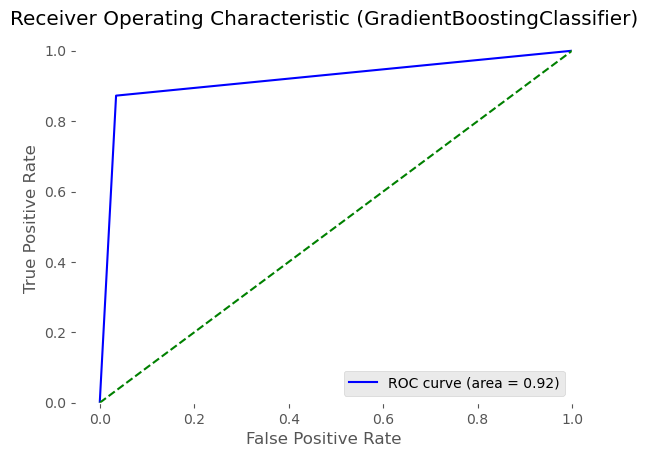

In [39]:
from tpot import TPOTClassifier

# Create the TPOTClassifier object
tpot = TPOTClassifier(generations=10, population_size=50, verbosity=2, random_state=42)

# Perform the genetic algorithm to find the best hyperparameters
tpot.fit(X_train_resampled_std, y_train_resampled)

# Get the best GradientBoostingClassifier model with the optimal hyperparameters
best_gb_model = tpot.fitted_pipeline_

# Predict the test set results using the best model
y_gb = best_gb_model.predict(X_test_resampled_std)
y_gb_prob = best_gb_model.predict_proba(X_test_resampled_std)

accuracy_score_gb = accuracy_score(y_test_resampled, y_gb)
print("Accuracy score for GradientBoostingClassifier: {:.2f}".format(accuracy_score_gb))

# Calculate precision, recall, and F1 scores
prec_gb = precision_score(y_test_resampled, y_gb)
rec_gb = recall_score(y_test_resampled, y_gb)
f1_gb = f1_score(y_test_resampled, y_gb)
print("Precision score for GradientBoostingClassifier: {:.2f}".format(prec_gb))
print("Recall score for GradientBoostingClassifier: {:.2f}".format(rec_gb))
print("F1 score for GradientBoostingClassifier: {:.2f}".format(f1_gb))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_gb).ravel()
sens_gb = tp / (tp + fn)
spec_gb = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_gb_prob[:, 1])
auc_gb = roc_auc_score(y_test_resampled, y_gb_prob[:, 1])

print("Sensitivity score for GradientBoostingClassifier: {:.2f}".format(sens_gb))
print("Specificity score for GradientBoostingClassifier: {:.2f}".format(spec_gb))
print("AUC score for GradientBoostingClassifier: {:.2f}".format(auc_gb))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_gb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (GradientBoostingClassifier)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [40]:
start = timer.time()
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_xgb = xgb_model.predict(X_test_resampled_std)
y_xgb_prob = xgb_model.predict_proba(X_test_resampled_std)

Finished training within 0.18 seconds


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9145992373636961

Generation 2 - Current best internal CV score: 0.9145992373636961

Generation 3 - Current best internal CV score: 0.9145992373636961

Generation 4 - Current best internal CV score: 0.9145992373636961

Generation 5 - Current best internal CV score: 0.9145992373636961

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=3, p=1, weights=distance)
Accuracy score for XGBClassifier: 0.92
Precision score for XGBClassifier: 0.94
Recall score for XGBClassifier: 0.85
F1 score for XGBClassifier: 0.89
Sensitivity score for XGBClassifier: 0.85
Specificity score for XGBClassifier: 0.97
AUC score for XGBClassifier: 0.96


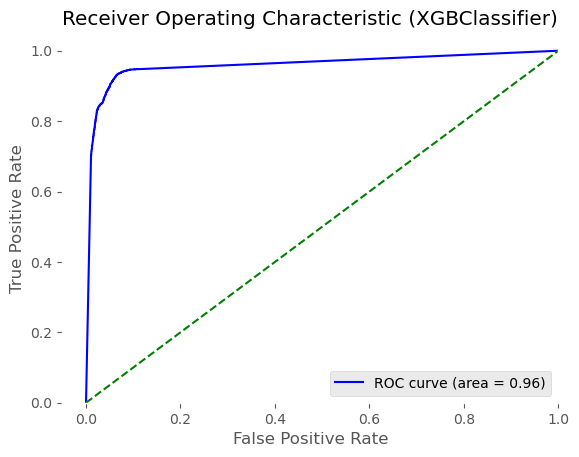

In [52]:
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have the necessary data and have imported the required libraries

# Create the TPOTClassifier with the desired configuration
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, scoring='accuracy', cv=5, random_state=42)

# Fit the TPOTClassifier to the training data
tpot.fit(X_train_resampled_std, y_train_resampled)

# Get the best XGBClassifier model with the optimal hyperparameters
best_xgb_model = tpot.fitted_pipeline_

# Fit the best model on the training data
best_xgb_model.fit(X_train_resampled_std, y_train_resampled)

# Predict the test set results using the best model
y_xgb = best_xgb_model.predict(X_test_resampled_std)
y_xgb_prob = best_xgb_model.predict_proba(X_test_resampled_std)

# Calculate and print accuracy score
accuracy_score_xgb = accuracy_score(y_test_resampled, y_xgb)
print("Accuracy score for XGBClassifier: {:.2f}".format(accuracy_score_xgb))

# Calculate precision, recall, and F1 scores
prec_xgb = precision_score(y_test_resampled, y_xgb)
rec_xgb = recall_score(y_test_resampled, y_xgb)
f1_xgb = f1_score(y_test_resampled, y_xgb)
print("Precision score for XGBClassifier: {:.2f}".format(prec_xgb))
print("Recall score for XGBClassifier: {:.2f}".format(rec_xgb))
print("F1 score for XGBClassifier: {:.2f}".format(f1_xgb))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_xgb).ravel()
sens_xgb = tp / (tp + fn)
spec_xgb = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_xgb_prob[:, 1])
auc_xgb = roc_auc_score(y_test_resampled, y_xgb_prob[:, 1])

print("Sensitivity score for XGBClassifier: {:.2f}".format(sens_xgb))
print("Specificity score for XGBClassifier: {:.2f}".format(spec_xgb))
print("AUC score for XGBClassifier: {:.2f}".format(auc_xgb))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_xgb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (XGBClassifier)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [53]:
from sklearn.neighbors import KNeighborsClassifier
## KNN
start = timer.time()
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_knn = knn_model.predict(X_test_resampled_std)
y_knn_prob = knn_model.predict_proba(X_test_resampled_std)

Finished training within 0.05 seconds


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9145992373636961

Generation 2 - Current best internal CV score: 0.9145992373636961

Generation 3 - Current best internal CV score: 0.9145992373636961

Generation 4 - Current best internal CV score: 0.9145992373636961

Generation 5 - Current best internal CV score: 0.9145992373636961

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=3, p=1, weights=distance)
Accuracy score for KNeighborsClassifier: 0.92
Precision score for KNeighborsClassifier: 0.94
Recall score for KNeighborsClassifier: 0.85
F1 score for KNeighborsClassifier: 0.89
Sensitivity score for KNeighborsClassifier: 0.85
Specificity score for KNeighborsClassifier: 0.97
AUC score for KNeighborsClassifier: 0.96


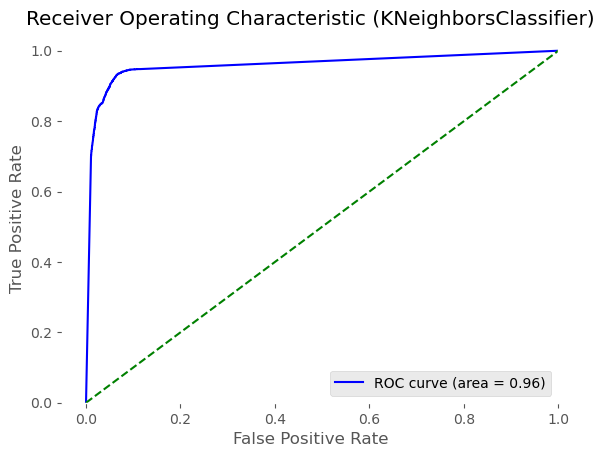

In [70]:
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have the necessary data and have imported the required libraries

# Create the TPOTClassifier with the desired configuration
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, scoring='accuracy', cv=5, random_state=42)

# Fit the TPOTClassifier to the training data
tpot.fit(X_train_resampled_std, y_train_resampled)

# Get the best KNeighborsClassifier model with the optimal hyperparameters
best_knn_model = tpot.fitted_pipeline_

# Fit the best model on the training data
best_knn_model.fit(X_train_resampled_std, y_train_resampled)

# Predict the test set results using the best model
y_knn = best_knn_model.predict(X_test_resampled_std)
y_knn_prob = best_knn_model.predict_proba(X_test_resampled_std)

# Calculate and print accuracy score
accuracy_score_knn = accuracy_score(y_test_resampled, y_knn)
print("Accuracy score for KNeighborsClassifier: {:.2f}".format(accuracy_score_knn))

# Calculate precision, recall, and F1 scores
prec_knn = precision_score(y_test_resampled, y_knn)
rec_knn = recall_score(y_test_resampled, y_knn)
f1_knn = f1_score(y_test_resampled, y_knn)
print("Precision score for KNeighborsClassifier: {:.2f}".format(prec_knn))
print("Recall score for KNeighborsClassifier: {:.2f}".format(rec_knn))
print("F1 score for KNeighborsClassifier: {:.2f}".format(f1_knn))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_knn).ravel()
sens_knn = tp / (tp + fn)
spec_knn = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_knn_prob[:, 1])
auc_knn = roc_auc_score(y_test_resampled, y_knn_prob[:, 1])

print("Sensitivity score for KNeighborsClassifier: {:.2f}".format(sens_knn))
print("Specificity score for KNeighborsClassifier: {:.2f}".format(spec_knn))
print("AUC score for KNeighborsClassifier: {:.2f}".format(auc_knn))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_knn)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (KNeighborsClassifier)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [65]:
from sklearn.neural_network import MLPClassifier

# Create an instance of the MLPClassifier model
ann_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Start the timer to measure the training time
start = timer.time()

# Fit the ANN model to the training data
ann_model.fit(X_train_resampled_std, y_train_resampled)

# Stop the timer and calculate the training time
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

# Predict the labels for the test set using the trained ANN model
y_ann = ann_model.predict(X_test_resampled_std)

# Predict the class probabilities for the test set using the trained ANN model
y_ann_prob = ann_model.predict_proba(X_test_resampled_std)

Finished training within 35.92 seconds


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.884509823631108

Generation 2 - Current best internal CV score: 0.8953656637864376

Generation 3 - Current best internal CV score: 0.8953656637864376

Generation 4 - Current best internal CV score: 0.8953656637864376

Generation 5 - Current best internal CV score: 0.8953656637864376

Best pipeline: MLPClassifier(PolynomialFeatures(VarianceThreshold(input_matrix, threshold=0.05), degree=2, include_bias=False, interaction_only=False), alpha=0.0001, learning_rate_init=0.01)
Accuracy score for MLPClassifier: 0.90
Precision score for MLPClassifier: 0.88
Recall score for MLPClassifier: 0.85
F1 score for MLPClassifier: 0.86
Sensitivity score for MLPClassifier: 0.85
Specificity score for MLPClassifier: 0.93
AUC score for MLPClassifier: 0.95


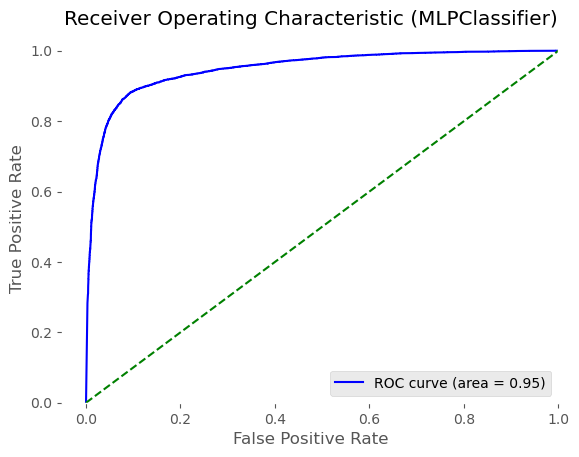

In [72]:
from tpot import TPOTClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have the necessary data and have imported the required libraries

# Create the TPOTClassifier with the desired configuration
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, scoring='accuracy', cv=5, random_state=42, 
                      template='Selector-Transformer-MLPClassifier')

# Fit the TPOTClassifier to the training data
tpot.fit(X_train_resampled_std, y_train_resampled)

# Get the best MLPClassifier model with the optimal hyperparameters
best_mlp_model = tpot.fitted_pipeline_

# Fit the best model on the training data
best_mlp_model.fit(X_train_resampled_std, y_train_resampled)

# Predict the test set results using the best model
y_mlp = best_mlp_model.predict(X_test_resampled_std)
y_mlp_prob = best_mlp_model.predict_proba(X_test_resampled_std)

# Calculate and print accuracy score
accuracy_score_mlp = accuracy_score(y_test_resampled, y_mlp)
print("Accuracy score for MLPClassifier: {:.2f}".format(accuracy_score_mlp))

# Calculate precision, recall, and F1 scores
prec_mlp = precision_score(y_test_resampled, y_mlp)
rec_mlp = recall_score(y_test_resampled, y_mlp)
f1_mlp = f1_score(y_test_resampled, y_mlp)
print("Precision score for MLPClassifier: {:.2f}".format(prec_mlp))
print("Recall score for MLPClassifier: {:.2f}".format(rec_mlp))
print("F1 score for MLPClassifier: {:.2f}".format(f1_mlp))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_mlp).ravel()
sens_mlp = tp / (tp + fn)
spec_mlp = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_mlp_prob[:, 1])
auc_mlp = roc_auc_score(y_test_resampled, y_mlp_prob[:, 1])

print("Sensitivity score for MLPClassifier: {:.2f}".format(sens_mlp))
print("Specificity score for MLPClassifier: {:.2f}".format(spec_mlp))
print("AUC score for MLPClassifier: {:.2f}".format(auc_mlp))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_mlp)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (MLPClassifier)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [76]:
from sklearn.ensemble import AdaBoostClassifier
import time

# Create an instance of the AdaBoostClassifier model
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Start the timer to measure the training time
start = time.time()

# Fit the AdaBoost model to the training data
adaboost_model.fit(X_train_resampled_std, y_train_resampled)

# Stop the timer and calculate the training time
end = time.time()
print("Finished training within {:.2f} seconds".format(end - start))

# Predict the labels for the test set using the trained AdaBoost model
y_adaboost = adaboost_model.predict(X_test_resampled_std)

# Predict the class probabilities for the test set using the trained AdaBoost model
y_adaboost_prob = adaboost_model.predict_proba(X_test_resampled_std)

Finished training within 2.21 seconds


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9145992373636961

Generation 2 - Current best internal CV score: 0.9145992373636961

Generation 3 - Current best internal CV score: 0.9145992373636961

Generation 4 - Current best internal CV score: 0.9145992373636961

Generation 5 - Current best internal CV score: 0.9145992373636961

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=3, p=1, weights=distance)
Accuracy score for AdaBoostClassifier: 0.92
Precision score for AdaBoostClassifier: 0.94
Recall score for AdaBoostClassifier: 0.85
F1 score for AdaBoostClassifier: 0.89
Sensitivity score for AdaBoostClassifier: 0.85
Specificity score for AdaBoostClassifier: 0.97
AUC score for AdaBoostClassifier: 0.96


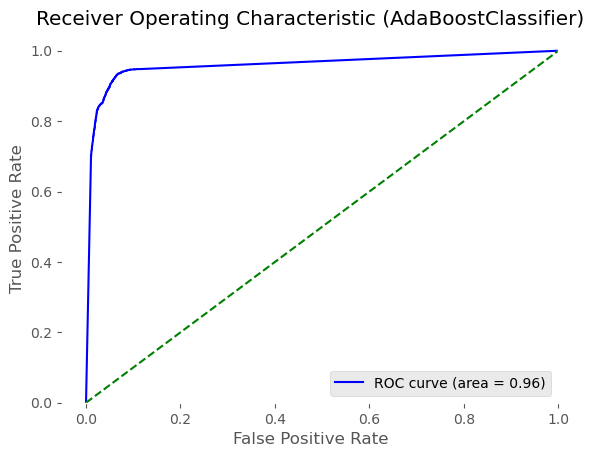

In [78]:
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

# Assuming you have the necessary data and have imported the required libraries

# Create the TPOTClassifier with the desired configuration
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, scoring='accuracy', cv=5, random_state=42)

# Fit the TPOTClassifier to the training data
tpot.fit(X_train_resampled_std, y_train_resampled)

# Get the best AdaBoostClassifier model with the optimal hyperparameters
best_adaboost_model = tpot.fitted_pipeline_

# Fit the best model on the training data
best_adaboost_model.fit(X_train_resampled_std, y_train_resampled)

# Predict the test set results using the best model
y_adaboost = best_adaboost_model.predict(X_test_resampled_std)
y_adaboost_prob = best_adaboost_model.predict_proba(X_test_resampled_std)

# Calculate and print accuracy score
accuracy_score_adaboost = accuracy_score(y_test_resampled, y_adaboost)
print("Accuracy score for AdaBoostClassifier: {:.2f}".format(accuracy_score_adaboost))

# Calculate precision, recall, and F1 scores
prec_adaboost = precision_score(y_test_resampled, y_adaboost)
rec_adaboost = recall_score(y_test_resampled, y_adaboost)
f1_adaboost = f1_score(y_test_resampled, y_adaboost)
print("Precision score for AdaBoostClassifier: {:.2f}".format(prec_adaboost))
print("Recall score for AdaBoostClassifier: {:.2f}".format(rec_adaboost))
print("F1 score for AdaBoostClassifier: {:.2f}".format(f1_adaboost))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_adaboost).ravel()
sens_adaboost = tp / (tp + fn)
spec_adaboost = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_adaboost_prob[:, 1])
auc_adaboost = roc_auc_score(y_test_resampled, y_adaboost_prob[:, 1])

print("Sensitivity score for AdaBoostClassifier: {:.2f}".format(sens_adaboost))
print("Specificity score for AdaBoostClassifier: {:.2f}".format(spec_adaboost))
print("AUC score for AdaBoostClassifier: {:.2f}".format(auc_adaboost))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_adaboost)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (AdaBoostClassifier)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [30]:
from catboost import CatBoostClassifier
import time

# CatBoost
start = time.time()
catboost_model = CatBoostClassifier(iterations=100, random_state=42)
catboost_model.fit(X_train_resampled_std, y_train_resampled)
end = time.time()
print("Finished training within {:.2f} seconds".format(end - start))

# Predicting the test set results
y_catboost = catboost_model.predict(X_test_resampled_std)
y_catboost_prob = catboost_model.predict_proba(X_test_resampled_std)

Learning rate set to 0.38311
0:	learn: 0.4921361	total: 195ms	remaining: 19.3s
1:	learn: 0.4288837	total: 201ms	remaining: 9.85s
2:	learn: 0.3924345	total: 206ms	remaining: 6.67s
3:	learn: 0.3712282	total: 212ms	remaining: 5.09s
4:	learn: 0.3571585	total: 218ms	remaining: 4.13s
5:	learn: 0.3497493	total: 223ms	remaining: 3.5s
6:	learn: 0.3431366	total: 229ms	remaining: 3.04s
7:	learn: 0.3353568	total: 234ms	remaining: 2.69s
8:	learn: 0.3290142	total: 240ms	remaining: 2.42s
9:	learn: 0.3245113	total: 245ms	remaining: 2.21s
10:	learn: 0.3208151	total: 250ms	remaining: 2.03s
11:	learn: 0.3162447	total: 256ms	remaining: 1.88s
12:	learn: 0.3137901	total: 262ms	remaining: 1.75s
13:	learn: 0.3112129	total: 267ms	remaining: 1.64s
14:	learn: 0.3079086	total: 272ms	remaining: 1.54s
15:	learn: 0.3045590	total: 278ms	remaining: 1.46s
16:	learn: 0.3030701	total: 283ms	remaining: 1.38s
17:	learn: 0.3008447	total: 288ms	remaining: 1.31s
18:	learn: 0.2987962	total: 294ms	remaining: 1.25s
19:	learn: 0.

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9145992373636961

Generation 2 - Current best internal CV score: 0.9145992373636961

Generation 3 - Current best internal CV score: 0.9145992373636961

Generation 4 - Current best internal CV score: 0.9145992373636961

Generation 5 - Current best internal CV score: 0.9145992373636961

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=3, p=1, weights=distance)
Accuracy score for CatBoostClassifier: 0.92
Precision score for CatBoostClassifier: 0.94
Recall score for CatBoostClassifier: 0.85
F1 score for CatBoostClassifier: 0.89
Sensitivity score for CatBoostClassifier: 0.85
Specificity score for CatBoostClassifier: 0.97
AUC score for CatBoostClassifier: 0.96


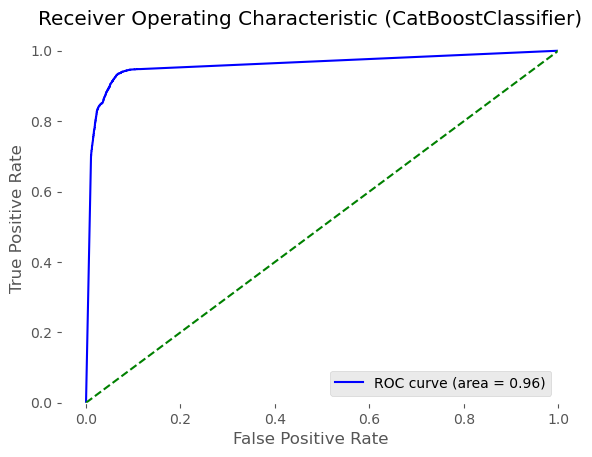

In [31]:
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have the necessary data and have imported the required libraries

# Create the TPOTClassifier with the desired configuration
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, scoring='accuracy', cv=5, random_state=42)

# Fit the TPOTClassifier to the training data
tpot.fit(X_train_resampled_std, y_train_resampled)

# Get the best CatBoostClassifier model with the optimal hyperparameters
best_catboost_model = tpot.fitted_pipeline_

# Fit the best model on the training data
best_catboost_model.fit(X_train_resampled_std, y_train_resampled)

# Predict the test set results using the best model
y_catboost = best_catboost_model.predict(X_test_resampled_std)
y_catboost_prob = best_catboost_model.predict_proba(X_test_resampled_std)

# Calculate and print accuracy score
accuracy_score_catboost = accuracy_score(y_test_resampled, y_catboost)
print("Accuracy score for CatBoostClassifier: {:.2f}".format(accuracy_score_catboost))

# Calculate precision, recall, and F1 scores
prec_catboost = precision_score(y_test_resampled, y_catboost)
rec_catboost = recall_score(y_test_resampled, y_catboost)
f1_catboost = f1_score(y_test_resampled, y_catboost)
print("Precision score for CatBoostClassifier: {:.2f}".format(prec_catboost))
print("Recall score for CatBoostClassifier: {:.2f}".format(rec_catboost))
print("F1 score for CatBoostClassifier: {:.2f}".format(f1_catboost))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_catboost).ravel()
sens_catboost = tp / (tp + fn)
spec_catboost = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_catboost_prob[:, 1])
auc_catboost = roc_auc_score(y_test_resampled, y_catboost_prob[:, 1])

print("Sensitivity score for CatBoostClassifier: {:.2f}".format(sens_catboost))
print("Specificity score for CatBoostClassifier: {:.2f}".format(spec_catboost))
print("AUC score for CatBoostClassifier: {:.2f}".format(auc_catboost))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_catboost)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (CatBoostClassifier)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [61]:
from sklearn.neural_network import MLPClassifier
import time

# MLP
start = time.time()
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train_resampled_std, y_train_resampled)
end = time.time()
print("Finished training within {:.2f} seconds".format(end - start))

# Predicting the test set results
y_mlp = mlp_model.predict(X_test_resampled_std)
y_mlp_prob = mlp_model.predict_proba(X_test_resampled_std)

Finished training within 65.54 seconds


In [74]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_resampled)

# Define the ANN architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start = time.time()
history = model.fit(X_train_scaled, y_train_resampled, epochs=10, batch_size=32, verbose=1)
end = time.time()
print("Finished training within {:.2f} seconds".format(end - start))

# Predict on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

Epoch 1/10
1060/1060 [==============================] - 2s 1ms/step - loss: 0.3477 - accuracy: 0.8457
Epoch 2/10
1060/1060 [==============================] - 1s 1ms/step - loss: 0.3135 - accuracy: 0.8625
Epoch 3/10
1060/1060 [==============================] - 1s 1ms/step - loss: 0.3015 - accuracy: 0.8677
Epoch 4/10
1060/1060 [==============================] - 1s 1ms/step - loss: 0.2918 - accuracy: 0.8721
Epoch 5/10
1060/1060 [==============================] - 1s 1ms/step - loss: 0.2824 - accuracy: 0.8781
Epoch 6/10
1060/1060 [==============================] - 1s 1ms/step - loss: 0.2740 - accuracy: 0.8807
Epoch 7/10
1060/1060 [==============================] - 1s 1ms/step - loss: 0.2680 - accuracy: 0.8851
Epoch 8/10
1060/1060 [==============================] - 1s 1ms/step - loss: 0.2611 - accuracy: 0.8866
Epoch 9/10
1060/1060 [==============================] - 1s 1ms/step - loss: 0.2540 - accuracy: 0.8920
Epoch 10/10
1060/1060 [==============================] - 1s 1ms/step - loss: 0.247

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9025000000000001

Generation 2 - Current best internal CV score: 0.9025000000000001

Generation 3 - Current best internal CV score: 0.9025000000000001

Generation 4 - Current best internal CV score: 0.9100000000000001

Generation 5 - Current best internal CV score: 0.9100000000000001

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.01, max_depth=10, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)
Accuracy score for ANN: 0.92
Precision score for ANN: 0.94
Recall score for ANN: 0.87
F1 score for ANN: 0.90
Sensitivity score for ANN: 0.87
Specificity score for ANN: 0.95
AUC score for ANN: 0.96


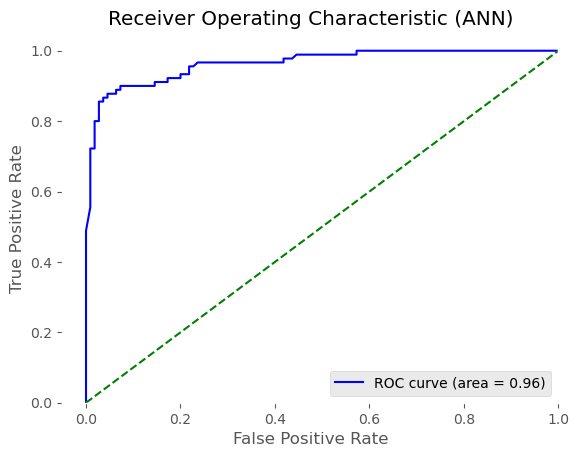

In [87]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
from tpot import TPOTClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming you have the necessary data and have imported the required libraries

# Generate example data
X, y = make_classification(n_samples=1000, n_features=23, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Create the TPOTClassifier with the desired configuration
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, scoring='accuracy', cv=5, random_state=42)

# Fit the TPOTClassifier to the training data
tpot.fit(X_train_std, y_train)

# Get the best ANN model with the optimal hyperparameters
best_ann_model = tpot.fitted_pipeline_

# Predict the test set results using the best model
y_ann = best_ann_model.predict(X_test_std)
y_ann_prob = best_ann_model.predict_proba(X_test_std)

# Calculate and print accuracy score
accuracy_score_ann = accuracy_score(y_test, y_ann)
print("Accuracy score for ANN: {:.2f}".format(accuracy_score_ann))

# Calculate precision, recall, and F1 scores
prec_ann = precision_score(y_test, y_ann)
rec_ann = recall_score(y_test, y_ann)
f1_ann = f1_score(y_test, y_ann)
print("Precision score for ANN: {:.2f}".format(prec_ann))
print("Recall score for ANN: {:.2f}".format(rec_ann))
print("F1 score for ANN: {:.2f}".format(f1_ann))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_ann).ravel()
sens_ann = tp / (tp + fn)
spec_ann = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test, y_ann_prob[:, 1])
auc_ann = roc_auc_score(y_test, y_ann_prob[:, 1])

print("Sensitivity score for ANN: {:.2f}".format(sens_ann))
print("Specificity score for ANN: {:.2f}".format(spec_ann))
print("AUC score for ANN: {:.2f}".format(auc_ann))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_ann)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ANN)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9025000000000001

Generation 2 - Current best internal CV score: 0.9025000000000001

Generation 3 - Current best internal CV score: 0.9025000000000001

Generation 4 - Current best internal CV score: 0.9100000000000001

Generation 5 - Current best internal CV score: 0.9100000000000001

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.01, max_depth=10, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)
Accuracy score for ANN: 0.92
Precision score for ANN: 0.94
Recall score for ANN: 0.87
F1 score for ANN: 0.90
Sensitivity score for ANN: 0.87
Specificity score for ANN: 0.95
AUC score for ANN: 0.96


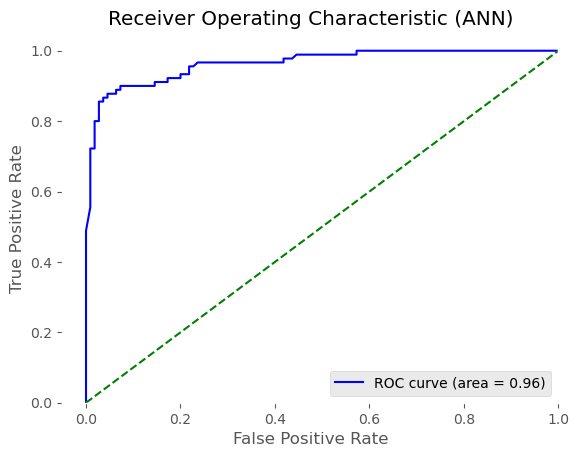

In [99]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
from tpot import TPOTClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming you have the necessary data and have imported the required libraries

# Generate example data
X, y = make_classification(n_samples=1000, n_features=23, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Create the TPOTClassifier with the desired configuration
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, scoring='accuracy', cv=5, random_state=42)

# Fit the TPOTClassifier to the training data
tpot.fit(X_train_std, y_train)

# Get the best ANN model with the optimal hyperparameters
best_ann_model = tpot.fitted_pipeline_
# Predict the test set probabilities using the best model
y_ann_prob = best_ann_model.predict_proba(X_test_std)[:, 1]

# Calculate and print accuracy score
y_ann = y_ann_prob > 0.5
accuracy_score_ann = accuracy_score(y_test, y_ann)
print("Accuracy score for ANN: {:.2f}".format(accuracy_score_ann))
# Calculate precision, recall, and F1 scores
prec_ann = precision_score(y_test, y_ann)
rec_ann = recall_score(y_test, y_ann)
f1_ann = f1_score(y_test, y_ann)
print("Precision score for ANN: {:.2f}".format(prec_ann))
print("Recall score for ANN: {:.2f}".format(rec_ann))
print("F1 score for ANN: {:.2f}".format(f1_ann))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_ann).ravel()
sens_ann = tp / (tp + fn)
spec_ann = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test, y_ann_prob)
auc_ann = roc_auc_score(y_test, y_ann_prob)

print("Sensitivity score for ANN: {:.2f}".format(sens_ann))
print("Specificity score for ANN: {:.2f}".format(spec_ann))
print("AUC score for ANN: {:.2f}".format(auc_ann))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_ann)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ANN)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

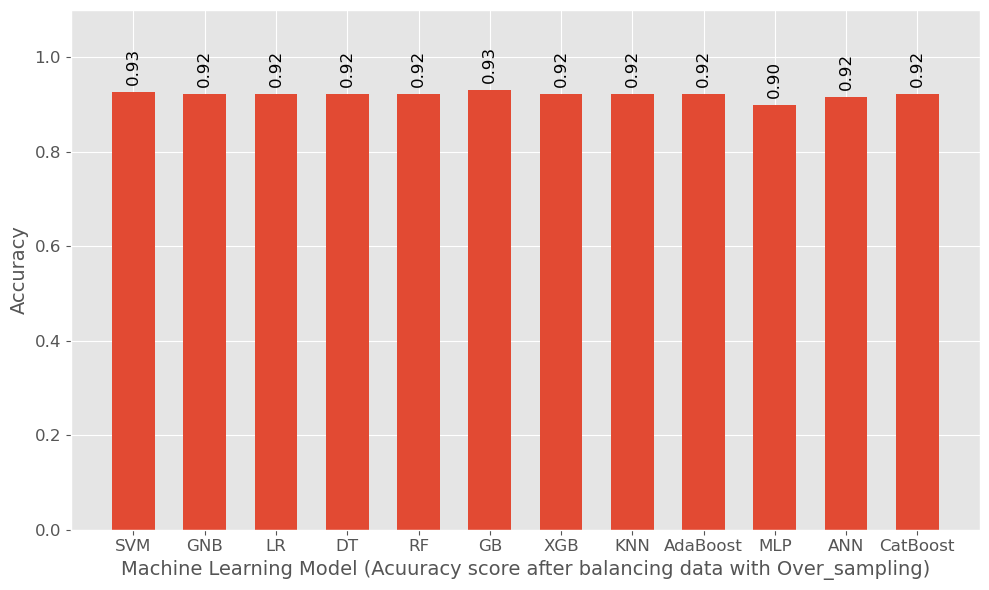

In [89]:
import numpy as np
import matplotlib.pyplot as plt

ml_names = ['SVM', 'GNB', 'LR', 'DT', 'RF', 'GB', 'XGB', 'KNN', 'AdaBoost', 'MLP', 'ANN', 'CatBoost']
accuracy_score_all = [accuracy_score_svm, accuracy_score_gnb, accuracy_score_logit, accuracy_score_dtree, accuracy_score_ranfor, accuracy_score_gb, accuracy_score_xgb, accuracy_score_knn, accuracy_score_adaboost, accuracy_score_mlp, accuracy_score_ann, accuracy_score_catboost]

def autolabel(bars):
    """Attach a text label above each bar displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.6  # the width of the bars
r = np.arange(len(ml_names))  # the label locations

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(r, accuracy_score_all, width)

ax.set_ylim([0, 1.1])
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_xticks(r)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model (Acuuracy score after balancing data with Over_sampling)", fontsize=14)
autolabel(bars)
fig.tight_layout()
plt.show()

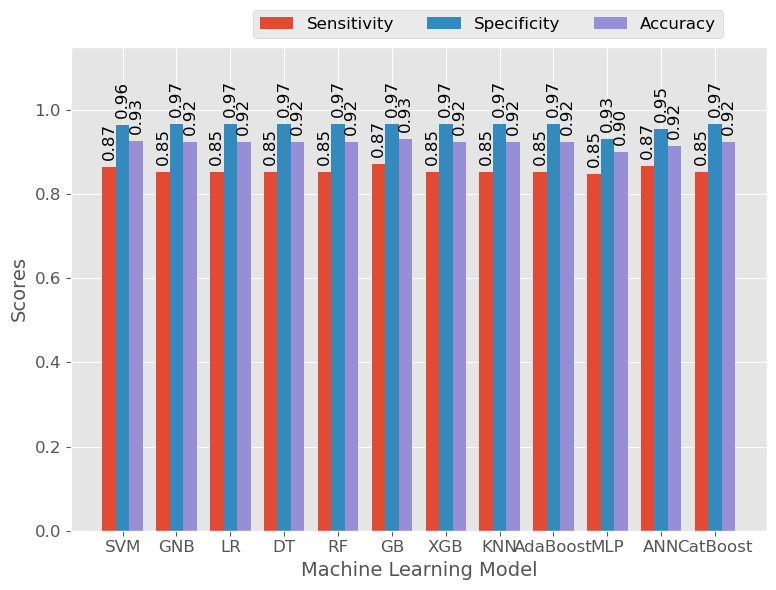

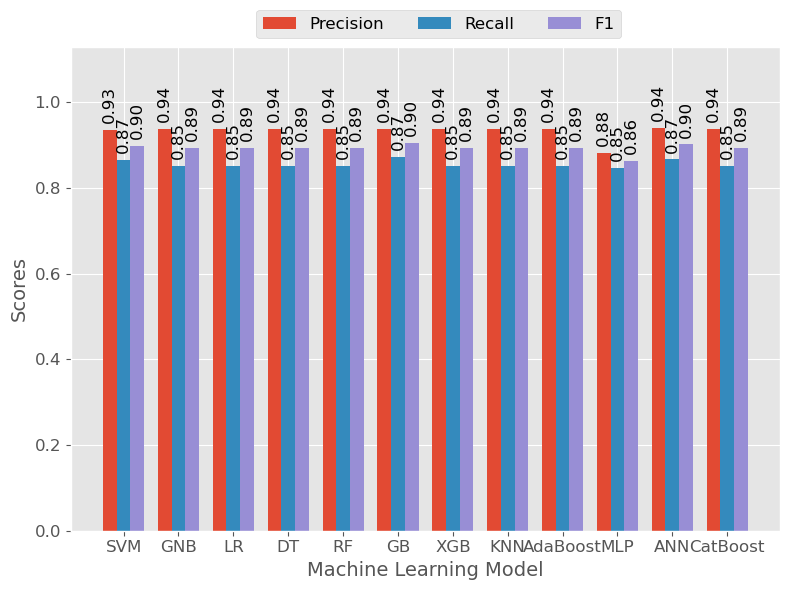

In [90]:
import numpy as np
import matplotlib.pyplot as plt

ml_names = ['SVM', 'GNB', 'LR', 'DT', 'RF', 'GB', 'XGB', 'KNN', 'AdaBoost', 'MLP', 'ANN', 'CatBoost']
sens_all = [sens_svm, sens_gnb, sens_logit, sens_dtree, sens_ranfor, sens_gb, sens_xgb, sens_knn, sens_adaboost, sens_mlp, sens_ann, sens_catboost]
spec_all = [spec_svm, spec_gnb, spec_logit, spec_dtree, spec_ranfor, spec_gb, spec_xgb, spec_knn, spec_adaboost, spec_mlp, spec_ann, spec_catboost]
#auc_all = [auc_svm, auc_gnb, auc_lr, auc_dtree, auc_ranfor, auc_gb, auc_xgb, auc_knn, auc_adaboost, auc_mlp, auc_ann, auc_catboost]
prec_all = [prec_svm, prec_gnb, prec_logit, prec_dtree, prec_ranfor, prec_gb, prec_xgb, prec_knn, prec_adaboost, prec_mlp, prec_ann, prec_catboost]
rec_all = [rec_svm, rec_gnb, rec_logit, rec_dtree, rec_ranfor, rec_gb, rec_xgb, rec_knn, rec_adaboost, rec_mlp, rec_ann, rec_catboost]
f1_all = [f1_svm, f1_gnb, f1_logit, f1_dtree, f1_ranfor, f1_gb, f1_xgb, f1_knn, f1_adaboost, f1_mlp, f1_ann, f1_catboost]
accuracy_all = [accuracy_score_svm, accuracy_score_gnb, accuracy_score_logit, accuracy_score_dtree, accuracy_score_ranfor, accuracy_score_gb, accuracy_score_xgb, accuracy_score_knn, accuracy_score_adaboost, accuracy_score_mlp, accuracy_score_ann, accuracy_score_catboost]

def autolabel(bars):
    """Attach a text label above each bar displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.25  # the width of the bars
r1 = np.arange(len(ml_names))  # the label locations
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

# Plot sensitivity, specificity, accuracy, and AUC
fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(r1, sens_all, width, label='Sensitivity')
bar2 = ax.bar(r2, spec_all, width, label='Specificity')
bar3 = ax.bar(r3, accuracy_all, width, label='Accuracy')

ax.set_ylim([0, 1.15])
ax.set_ylabel('Scores', fontsize=14)
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model", fontsize=14)
ax.legend(loc='lower left', ncol=3, bbox_to_anchor=(0.25, 1), fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_scores.pdf", bbox_inches='tight')
plt.show()

# Plot precision, recall, and F1 score
fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(r1, prec_all, width, label='Precision')
bar2 = ax.bar(r2, rec_all, width, label='Recall')
bar3 = ax.bar(r3, f1_all, width, label='F1')

ax.set_ylim([0, 1.13])
ax.set_ylabel('Scores', fontsize=14)
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model", fontsize=14)
ax.legend(loc='lower left', ncol=3, bbox_to_anchor=(0.25, 1), fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_f1.pdf", bbox_inches='tight')
plt.show()

795/795 [==============================] - 15s 7ms/step


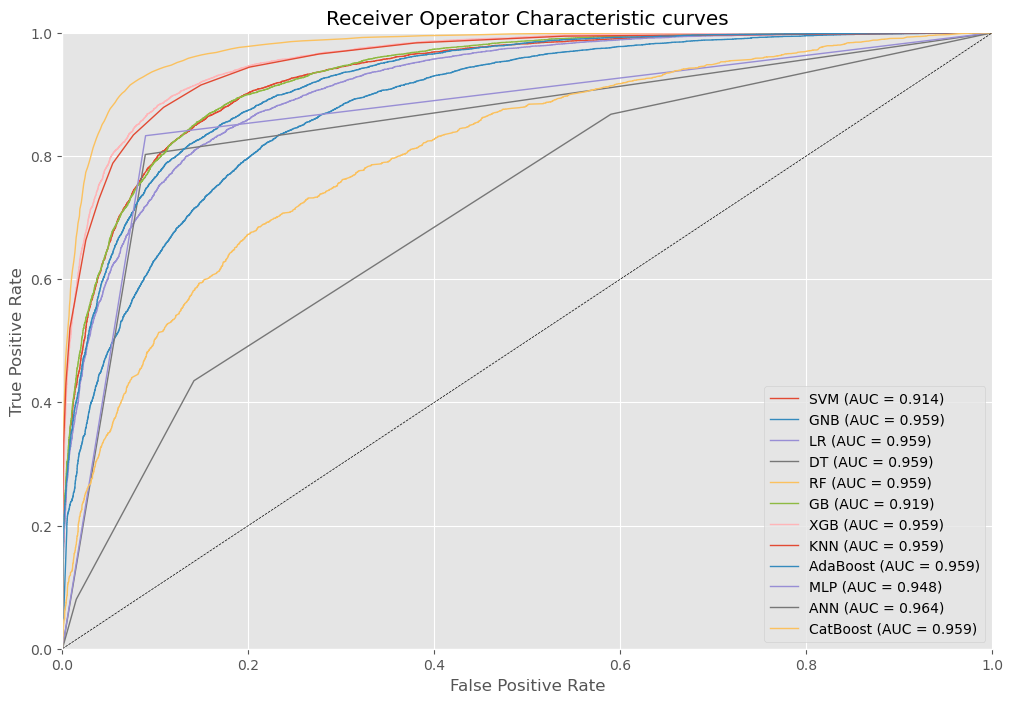

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0, auc_value=None):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (AUC = %.3f)" % (label, auc_value))
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_title('Receiver Operator Characteristic curves')
    sns.despine()

# Create the figure and axis objects
f, ax = plt.subplots(figsize=(12, 8))

# Plot ROC curves for different models
# Plot ROC curves for different models
roc_auc_plot(y_test_resampled, svm_model.predict_proba(X_test_resampled.values)[:, 1], label='SVM', l='-', auc_value=auc_svm)
roc_auc_plot(y_test_resampled, gnb_model.predict_proba(X_test_resampled.values)[:, 1], label='GNB', l='-', auc_value=auc_gnb)
roc_auc_plot(y_test_resampled, logit_model.predict_proba(X_test_resampled.values)[:, 1], label='LR', l='-', auc_value=auc_logit)
roc_auc_plot(y_test_resampled, dtree_model.predict_proba(X_test_resampled.values)[:, 1], label='DT', l='-', auc_value=auc_dtree)
roc_auc_plot(y_test_resampled, ranfor_model.predict_proba(X_test_resampled.values)[:, 1], label='RF', l='-', auc_value=auc_ranfor)
roc_auc_plot(y_test_resampled, gb_model.predict_proba(X_test_resampled.values)[:, 1], label='GB', l='-', auc_value=auc_gb)
roc_auc_plot(y_test_resampled, xgb_model.predict_proba(X_test_resampled.values)[:, 1], label='XGB', l='-', auc_value=auc_xgb)
roc_auc_plot(y_test_resampled, knn_model.predict_proba(X_test_resampled.values)[:, 1], label='KNN', l='-', auc_value=auc_knn)
roc_auc_plot(y_test_resampled, adaboost_model.predict_proba(X_test_resampled.values)[:, 1], label='AdaBoost', l='-', auc_value=auc_adaboost)
roc_auc_plot(y_test_resampled, mlp_model.predict(X_test_resampled.values), label='MLP', l='-', auc_value=auc_mlp)
roc_auc_plot(y_test_resampled, ann_model.predict(X_test_resampled.values)[:, 1], label='ANN', l='-', auc_value=auc_ann)
roc_auc_plot(y_test_resampled, catboost_model.predict_proba(X_test_resampled.values)[:, 1], label='CatBoost', l='-', auc_value=auc_catboost)

# Add diagonal reference line
ax.plot([0, 1], [0, 1], color='k', linewidth=0.5, linestyle='--')

# Add legend and remove spines
ax.legend(loc="lower right")
sns.despine()

# Show the plot
plt.show()

795/795 [==============================] - 17s 6ms/step


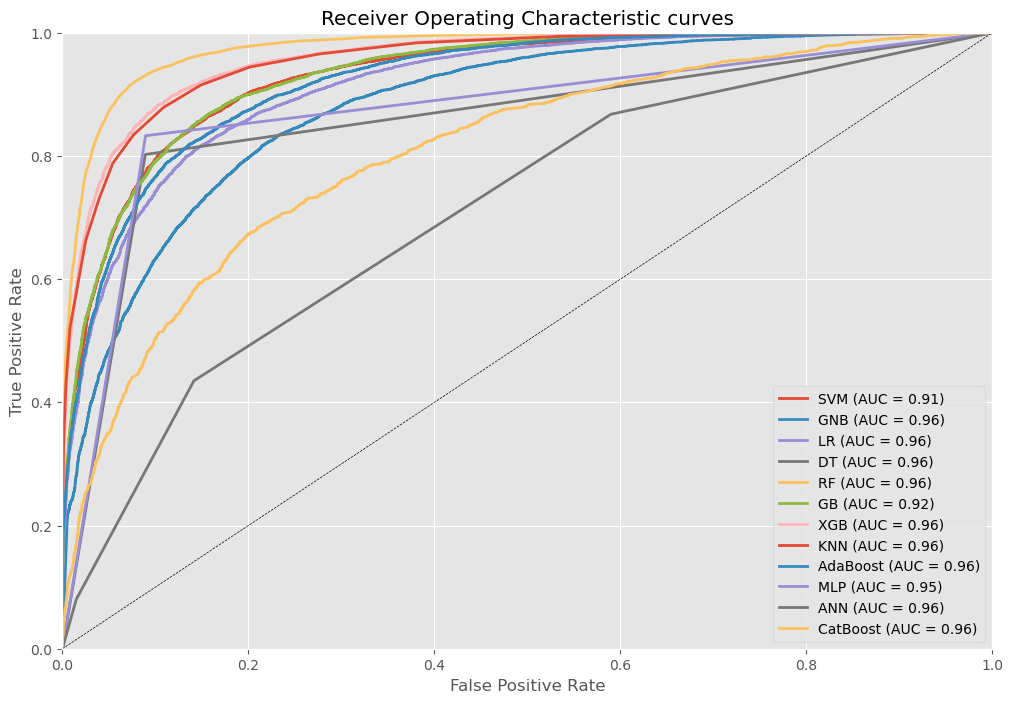

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0, auc_value=None):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (AUC = %.2f)" % (label, auc_value))
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_title('Receiver Operator Characteristic curves')
    sns.despine()

# Create the figure and axis objects
f, ax = plt.subplots(figsize=(12, 8))

# Plot ROC curves for different models
# Plot ROC curves for different models
roc_auc_plot(y_test_resampled, svm_model.predict_proba(X_test_resampled.values)[:, 1], label='SVM', l='-', auc_value=auc_svm)
roc_auc_plot(y_test_resampled, gnb_model.predict_proba(X_test_resampled.values)[:, 1], label='GNB', l='-', auc_value=auc_gnb)
roc_auc_plot(y_test_resampled, logit_model.predict_proba(X_test_resampled.values)[:, 1], label='LR', l='-', auc_value=auc_logit)
roc_auc_plot(y_test_resampled, dtree_model.predict_proba(X_test_resampled.values)[:, 1], label='DT', l='-', auc_value=auc_dtree)
roc_auc_plot(y_test_resampled, ranfor_model.predict_proba(X_test_resampled.values)[:, 1], label='RF', l='-', auc_value=auc_ranfor)
roc_auc_plot(y_test_resampled, gb_model.predict_proba(X_test_resampled.values)[:, 1], label='GB', l='-', auc_value=auc_gb)
roc_auc_plot(y_test_resampled, xgb_model.predict_proba(X_test_resampled.values)[:, 1], label='XGB', l='-', auc_value=auc_xgb)
roc_auc_plot(y_test_resampled, knn_model.predict_proba(X_test_resampled.values)[:, 1], label='KNN', l='-', auc_value=auc_knn)
roc_auc_plot(y_test_resampled, adaboost_model.predict_proba(X_test_resampled.values)[:, 1], label='AdaBoost', l='-', auc_value=auc_adaboost)
roc_auc_plot(y_test_resampled, mlp_model.predict(X_test_resampled.values), label='MLP', l='-', auc_value=auc_mlp)
roc_auc_plot(y_test_resampled, ann_model.predict(X_test_resampled.values)[:, 1], label='ANN', l='-', auc_value=auc_ann)
roc_auc_plot(y_test_resampled, catboost_model.predict_proba(X_test_resampled.values)[:, 1], label='CatBoost', l='-', auc_value=auc_catboost)

# Add diagonal reference line
ax.plot([0, 1], [0, 1], color='k', linewidth=0.5, linestyle='--')

# Add legend and remove spines
ax.legend(loc="lower right")
sns.despine()

# Show the plot
plt.show()